# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class as detailed in the first tutorial.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. This class was utilised in the second tutorial. We will use the simulation module soon, but we need to build a system first.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# Setting up *Manager* and *Builder* classes

In [2]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)
builder = BuildAmberSystems(manager)

### Generate topology and coordinate files of a solvated molecule from its SMILES string

For an example in this guide, simulations will be explained with a small system of a solvated molecule. You can use any molecule you desire **(please do as we can *stress test* the code)** provided you have the SMILES string for it, but this guide will use Caftaric acid (random molcule which is relatively big, especially compared to caffeine in the tutorials. <br> 

**Name:** Caftaric acid <Br>
**SMILES:** C1=CC(=C(C=C1C=CC(=O)OC(C(C(=O)O)O)C(=O)O)O)O <br>

*Note: parameterization can take a while - go make a cake or something*


The next block of code uses the caftaric acid smiles string and goes through all of the steps. This is an example of the code shown in the tutorials can be piped together to make an entire python script. <br>

There are a series of **if statements** that check if certain files exist and allows the code to proceed without any expected errors.

In [3]:
import sys

# Build the pdb file
builder.SmilesToPDB_GenResCode("C1=CC(=C(C=C1C=CC(=O)OC(C(C(=O)O)O)C(=O)O)O)O", "caftaric_acid")

# Check if pdb file was built
if manager.load_pdb_filepath("caftaric_acid") is not None:
    pass
else:
    # Exit if no pdb file was generated
    print("No pdb file generated")
    sys.exit()

# Parameterize the molecule
builder.parameterize_mol("caftaric_acid")

# Check if mol2 file from parameterization was generated
if manager.load_mol2_filepath("caftaric_acid") is not None:
    pass
else:
    # Exit if no mol2 file is generates
    print("Molecule not paramerterized properly")
    sys.exit()

# Solvate the molecule and generate Amber topologies and coordinates
solvated_molecule = builder.solvate_molecule("caftaric_acid")

# Check if Amber topologies and coordinates for the system exist
top, coord = manager.load_amber_filepaths(solvated_molecule)
if top is not None and coord is not None:
    pass
else:
    # Exit is no Amber topology and coordinate file was generated for the system
    print("Amber topology and coordinates not generated properly")
    sys.exit()
    

Output: 
Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
Info: Determining atomic numbers from atomic symbols which are case sensitive.
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Running: /home/dan/miniconda3/envs/AmberTools23/bin/bondtype -j full -i ANTECHAMBER_BOND_TYPE.AC0 -o ANTECHAMBER_BOND_TYPE.AC -f ac

Running: /home/dan/miniconda3/envs/AmberTools23/bin/atomtype -i ANTECHAMBER_AC.AC0 -o ANTECHAMBER_AC.AC -p gaff
Info: Total number of electrons: 162; net ch

# Simulation

Now a system has been prepared with the Amber topology and coordinates - lets move on to the focus of this notebook.

## Import the **sw_openmm** module

In [4]:
from modules.sw_openmm import *

Now an **AmberSimulation** object can be created using the generated topology and coordinate files.

In [5]:
# Check the topology and coordinate file from the large block of code used to generate them - they are stored in the variables 'top' and 'coord'
top, coord

('/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv/caftaric_acid_wat_solv_16.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv/caftaric_acid_wat_solv_16.rst7')

In [6]:
# Set up the AmberSimualtion object by passing the; manager, top, coord
simulation = AmberSimulation(manager, top, coord)

### Investigate class

Before carrying out any simulations or even setting them up, lets see what the simulation class includes. <br>

Calling 'help(class)' will show the contents of each class, here we will investigate the **AmberSimulation** class: <br>

    - AmberSimulation: Class inheriting methods from BuildSimulation but also contains method to set up simulations using Amber topologies and parameters.

A lot of stuff will be printed out at this point, there are a series of things: <br>

    - Methods in the class (a method is a function that is contained in a class)
    - class variables (these are preset variables assigned to the class - i.e. default simulation parameters)
    - static methods (methods the class has that don't require any other info to be passed to it - i.e. doesn't require topology or coordinate files)

In [7]:
# Shows the functions and varaibles contained inside the BuildSimulation class
print(help(AmberSimulation))

Help on class AmberSimulation in module modules.sw_openmm:

class AmberSimulation(BuildSimulation)
 |  AmberSimulation(manager, topology_file, coordinates_file)
 |
 |  A class representing an AMBER molecular dynamics simulation.
 |
 |  Attributes:
 |      directories (str): A directories obejct generated with sw_directories which manages filepaths during simulations.
 |      topology_file (str): A string representing the path to the topology file.
 |      coordinates_file (str): A string representing the path to the coordinates file.
 |
 |  Methods:
 |      __init__(directories, topology_file, coordinates_file):
 |          Initializes an AmberSimulation object with specified directories, topology file, and coordinates file.
 |      __str__():
 |          Returns a string representation of the AmberSimulation object.
 |
 |  Method resolution order:
 |      AmberSimulation
 |      BuildSimulation
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, manager, topolog

Before investigating the class - the simulation object was initialized. <br>

There are some useful methods to check the type of simulation and the parameters. <br>

repr(sim) - this will return the current simulation parameters given. <br>
str(sim) - this will return the type of object our simulation is.



In [8]:
# Prints out the parameters defined for simulations
repr(simulation)

Simulation parameters: ('1', '300', '2.0, 1.0, 1000, 1000')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

In [9]:
# Prints out the type of simulation and what system is in the simulation object
str(simulation)

'Amber simulation object of - caftaric_acid_wat_solv_16'

The timestamp of when the simulation was initiated can also be printed. Each simulation is given a unique timestamp so each simulation has its own unique identity. This is required to avoid simulations of the same system overwriting pre existing files

In [10]:
# Prints out the start time of the simulation in the format: year-month-day_hour-minute-second
simulation.display_start_time()

Simulation initiated at:  2024-09-05_115301


 ## Setting parameters

As mentioned when the class was investigated, there are some default parameters for simulation, these can be easily changed.
 
 The list of parameters we can change is: <br>
> temperature <br>
> pressure <br>
> timestep <br>
> friction coeffiecient (you should not need to change this) <br>
> total steps <br>
> reporter freqeuncy <br>
> annealing parameters <br>
     
##### What is the friction coefficient? 
This is a parameter that indicates the strength of the coupling between the heat bath and the system being simulated. This parameter determines how quickly a particles velocity relaxes toward equilibrium. Don't alter this value unless you have a good reason to!

We can check our parameters by running: **simulation_object.parameter**. The list of parameters are: <br>
- sim.temp
- sim.pressure
- sim.timestep
- sim.friction_coeff
- sim.total_steps
- sim.reporter_freq
- sim.anneal_parameters

In [11]:
# Print out simulation paramaters - these are all retrieved from default variables set in the class
simulation.temp, simulation.pressure, simulation.timestep, simulation.friction_coeff, simulation.total_steps, simulation.reporter_freq

(300, 1, 2.0, 1.0, 1000, 1000)

We can also look at our annealing parameters

In [12]:
# Print out annealing parameters - annealing parameters are different to the standard parameters as heating cycles need to be managed
simulation.anneal_parameters

[300, 700, 5, 3000, 100]

Now lets set some new parameters by running: **simulation_object.set_parameter(new_parameter)**

In [13]:
# Set a new temperature
simulation.set_temperature(400)

Temperature set to:  400 kelvin


In [14]:
# Set a new pressure
simulation.set_pressure(2)

Pressure set to:  2  atmospheres


In [15]:
# Set a new friction coefficient - this was 1.0 anyway, but this is how you would change it
simulation.set_friction_coeff(1.0)

Friction coeffiecent set to:  1.0


In [16]:
# Set a new number of total steps
simulation.set_total_steps(20000)

Total steps for simulation set to:  20000


In [17]:
# Set a new reporter frequenct
simulation.set_reporter_freq(100) # Sampling data every 100 steps is typically too often. However, for a small simulation example, more data means better graphs. 

Reporter frequency set to every:  100  steps


Setting the parameters of annealing is the only method of setting parameters that is different. Here, we require a list of parameters - for example I will pass a single number to it.

In [18]:
# Try passing a single number to the 'set_anneal_parameters' method
simulation.set_anneal_parameters([2])

ValueError: Invalid parameters provided. Expected format: [start_temp, max_temp, cycles, holding_steps, steps_at_temp]

We see an error that expected our parameters in a different format; **[start_temp, max_temp, cycles, holding_steps, steps_at_temp]** <br>

**These parameters are:** <br>
> *start_temp*: the starting temperature of each annealing cycles <br>
> *max_temp*: the target temperature of each annealing cycle <br>
> *cycles*: the number of annealing cycles <br>
> *holding_steps*: the number of steps spent at the start_temp and max_temp during cylces <br>
> *steps_at_temp*: the number of steps spent at each individual temperature during heating/cooling <br> 
    

It is a good idea to set the start temp to the same temperature as the simulation.

##### Why do we have holding steps?

These aren't explicitly necessary, but ensure the simulation spends more than a few steps at the target temperature.

In [19]:
# Display help for setting annealing parameter - currently not working
simulation.set_anneal_parameters_help()


        Class method to set annealing parameters.

        Args:
            cls: The class itself.
            new_anneal_parameters (list): List of annealing parameters in the format [start_temp, max_temp, cycles, holding_steps, steps_at_temp].

        Returns:
            None

        Raises:
            ValueError: If the length of new_anneal_parameters does not match the expected length.

        Notes:
            This method sets the annealing parameters class attribute to the specified list. 
            It prints a confirmation message with the provided parameters.
        


In [20]:
# Method to set annealing paramters in the format: sim.set_anneal_parameters([start_temp, target_temp, cycles, steps_at_target_temp, steps_at_each temp])
simulation.set_anneal_parameters([simulation.temp, 700, 5, 1000, 100])

Anneal parameters set.
Starting temperature is:  400
Target temperature is:  700
Number of annealing cycles is:  5
Steps at target/start temperature is:  1000
Steps at each incremental temperature is:  100


Now we can check our new parameters by running: **repr(sim)**

In [21]:
# Prints out the parameters defined for simulations (this will not display annealing parameters)
repr(simulation)

Simulation parameters: ('1', '400', '2.0, 1.0, 20000, 100')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

## Running simulations explained

### Minimize energy

Minimizing the energy of a system and finds the local minimum energy of the system and ensures a good starting structure. <br>

This step is run with: **simulation_object.minimize_energy()**

### Annealing

Annealing ramps the temperature of the system to a given target temperature in a given number of cycles. This allows for components within the system to be mixed well and start from non-biased positions. This is an NVT ensemble. <br>

This step is run with: **simulation.anneal()** <br>

This uses the annealing parameters that were set with **sim.set_anneal_parameters(start_temp, max_temp, cycles, holding_steps, steps_at_temp)** <br>

***Important:*** You can override the parameters set into the simulation object by specifying then individually when you are annealing the system. Howver, it is recommended to set the parameters and then anneal system in seperate steps.* <br>

**simulation.anneal(start_temp, max_temp, cycles, holding_steps, steps_at_temp)** <br>

*Note: sometimes you will not want to anneal a system - in cases where you want to investigate your starting structure and not a randomly distributed system*

### Equilibration

Equilibration applies pressure to a system and allows it to *equilibrate* to the correct density for that given pressure. This ensures our system starts from the correct density and the volume of our system is correct. This is an NPT ensemble .<br>

*Note: it is key to check the density of your simulation after equilibration against any experimental data where possible*

### Production run

The production is the **meat** of the simulation. At this stage we have a minimized, equilibrated (and in some cases) and annealed a system; it is time to run a longer NVT simulation to see how the system evolves over a given period of time. These are the results we will analyse.

#### Recommended recipes

For a molecular dynamic simulation, you will want to create a *recipe*. This is series of steps you are taking to reach and run the production run.

1. Minimization --> Annealing -- > Equilibration --> Production run <br>
**For use with complex mixtures of molecules**<br>
2. Minimization --> Equilibration --> Produciton run <br>
**For use with systems where the initial structure is to be investigated**

### Help

If you are unsure about the use of a function, helper functions can let us see how to use the function.

In [22]:
# Display help for minimize energy method
simulation.minimize_energy_help()


        Function to perform energy minimization of the system using Langevin dynamics.
        
        USAGE:
            minimized_sim = simulation_object.minimize_energy()

        Returns:
            minimized_simulation_object
        


In [23]:
# Display help for running a simulated annealing of a given system
simulation.anneal_help()


        Function to perform simulated annealing on the provided simulation system.
        
        USAGE: 
            annealed_sim = sim.anneal(simulation, start_temp, max_temp, cycles, holding_steps, steps_at_temp)            
        
        Recommended USAGE:
            annealed_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following function:
                
            simulation_object.set_anneal_parameters([start_temp, max_temp, cycles, holding_steps, steps_at_each_temp])
        
        Args:
            simulation (app.Simulation): The simulation object to perform annealing on.
            
            start_temp (float, optional): The starting temperature for annealing in Kelvin. Defaults to None, 
                in which case the value is fetched from self.anneal_parameters[0].
                
            max_temp (float, optional): The maximum temperature for annealing in Kelvin. Defaults to None, 
               

In [24]:
# Display help for equilibrating a system with molecular dynamics
simulation.equilibrate_help()


        Function to equilibrate the provided simulation to reach a specified temperature and pressure.
        
        USAGE: 
            equilibrated_sim = sim.anneal(simulation, total_steps, temp, pressure)            
        
        Recommended USAGE:
            equilibrated_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following functions:
                
            simulation_object.set_temperature(temperature)
            simulation_object.set_pressure(pressure)
            simulation_object.set_total_steps(total_steps)
            
        Args:
            simulation (app.Simulation): The simulation object to equilibrate.
            
            total_steps (int, optional): The total number of steps to run for equilibration. Defaults to None, 
                in which case the value is fetched from self.total_steps.
                
            temp (float, optional): The target temperature for equilibration in Kelvin

In [25]:
# Display help for the production run step of a molecular dynamics simulation
simulation.production_run_help()


        Function to perform a production run simulation with the provided parameters.
        
        USAGE: 
            production_run_sim = sim.anneal(simulation, total_steps, temp)            
        
        Recommended USAGE:
            production_run_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following functions:
                
            simulation_object.set_temperature(temperature)
            simulation_object.set_total_steps(total_steps)
            
        Args:
            simulation (app.Simulation): The simulation object to run the production simulation on.
            
            total_steps (int, optional): The total number of steps to run for the production simulation. 
                Defaults to None, in which case the value is fetched from self.total_steps.
            
            temp (float, optional): The temperature for the production simulation in Kelvin. 
                Defaults to None, in wh

In [26]:
# Display help on how to use a function to generate graphs for the data
simulation.graph_state_data_help()


        Function to generate a plot from simulation data and save it as a PNG file.
        
        USAGE:
            The variable used for this plot is the second element of the tuple coming from the following method:
                **anneal**
                **equilibrate**
                **production_run**
                
            sim.graph_state_data(returned_simulation_variable)
            
            An example of this returned_simulation_varaible is:
                sim.anneal(minimized_sim)[0]
        
        Args:
            data_file (str): The path to the CSV file containing simulation data.
            
        Notes:
            This method reads simulation data from a CSV file, creates plots for each column of data
            against time, and saves the resulting plot as a PNG file. The CSV file is expected to have
            a "Time (ps)" column and numerical data columns representing different states of the
            simulation over time.

            T

### Running simulations

One thing to note - the initial object we loaded (in this case "simulation") is our simulation and is what we will call (and have been calling) when setting parameters and calling functions. Any new variables we define (as in the next cell) such as **minimized_simulation** are just variables and are used for inputs into our new functions - this will make sense as we carry on!

In [27]:
# Minimize the energy of a system
minimized_simulation = simulation.minimize_energy()

In [28]:
# Set anneal parameters
simulation.set_anneal_parameters([300, 500, 3, 1000, 10])

Anneal parameters set.
Starting temperature is:  300
Target temperature is:  500
Number of annealing cycles is:  3
Steps at target/start temperature is:  1000
Steps at each incremental temperature is:  10


When we carry out annealing, equilibration or a production run a tuple is returned: (simulation_object, simulation_data).<br>
The line below unpacks the tuple into 2 variabled **annealed_simulation** and **annealed_simulation_data** straight from the class method.

In [29]:
# Run an annealing simulation and retrieve the simulation and simulation data
annealed_simulation, annealed_simulation_data = simulation.anneal(minimized_simulation)

Now we have unpacked our variable **annealed_simulation_data** we can plot it using the built in state data plotter.

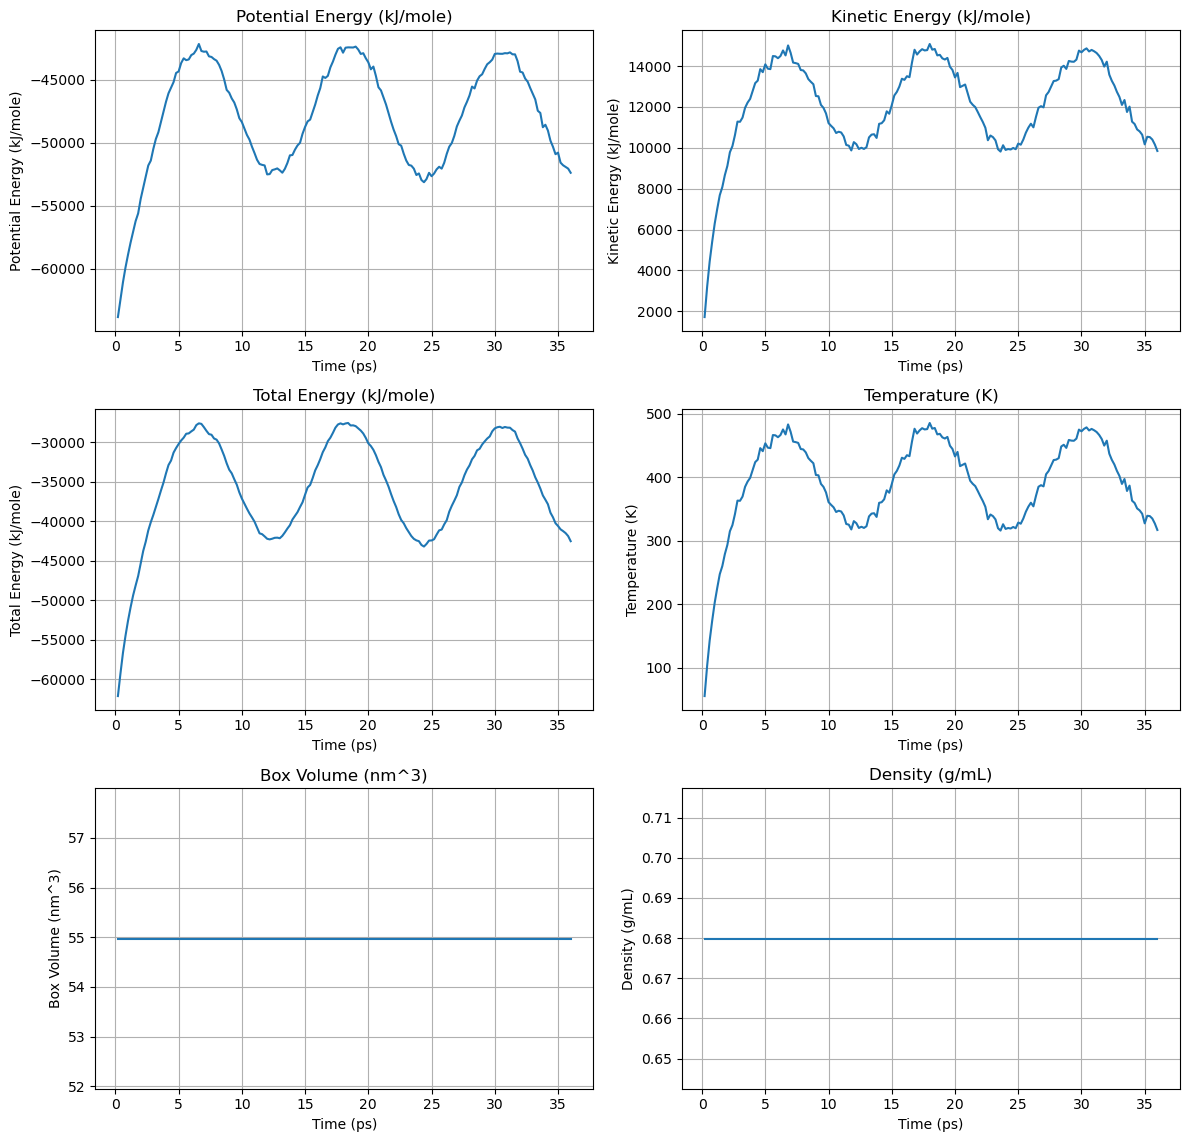

In [30]:
# Generate graphs for the annealing stage of the simulation
simulation.graph_state_data(annealed_simulation_data)

And we can use the **annealed_simulation** variable for an input into the next stage of the simulation. <br>

But first, lets set some variables - we can check them first to see what we want to change.

In [31]:
repr(simulation)

Simulation parameters: ('1', '400', '2.0, 1.0, 20000, 100')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

In [32]:
# Set some of the simulation parameters
simulation.set_temperature(300)
simulation.set_total_steps(50000)
simulation.set_reporter_freq(100)
simulation.set_pressure(1)

Temperature set to:  300 kelvin
Total steps for simulation set to:  50000
Reporter frequency set to every:  100  steps
Pressure set to:  1  atmospheres


In [33]:
# Run an equilibration simualtion and retrieve the simulation and simulation data
equilibrated_simulation, equilibrated_simulation_data = simulation.equilibrate(annealed_simulation)

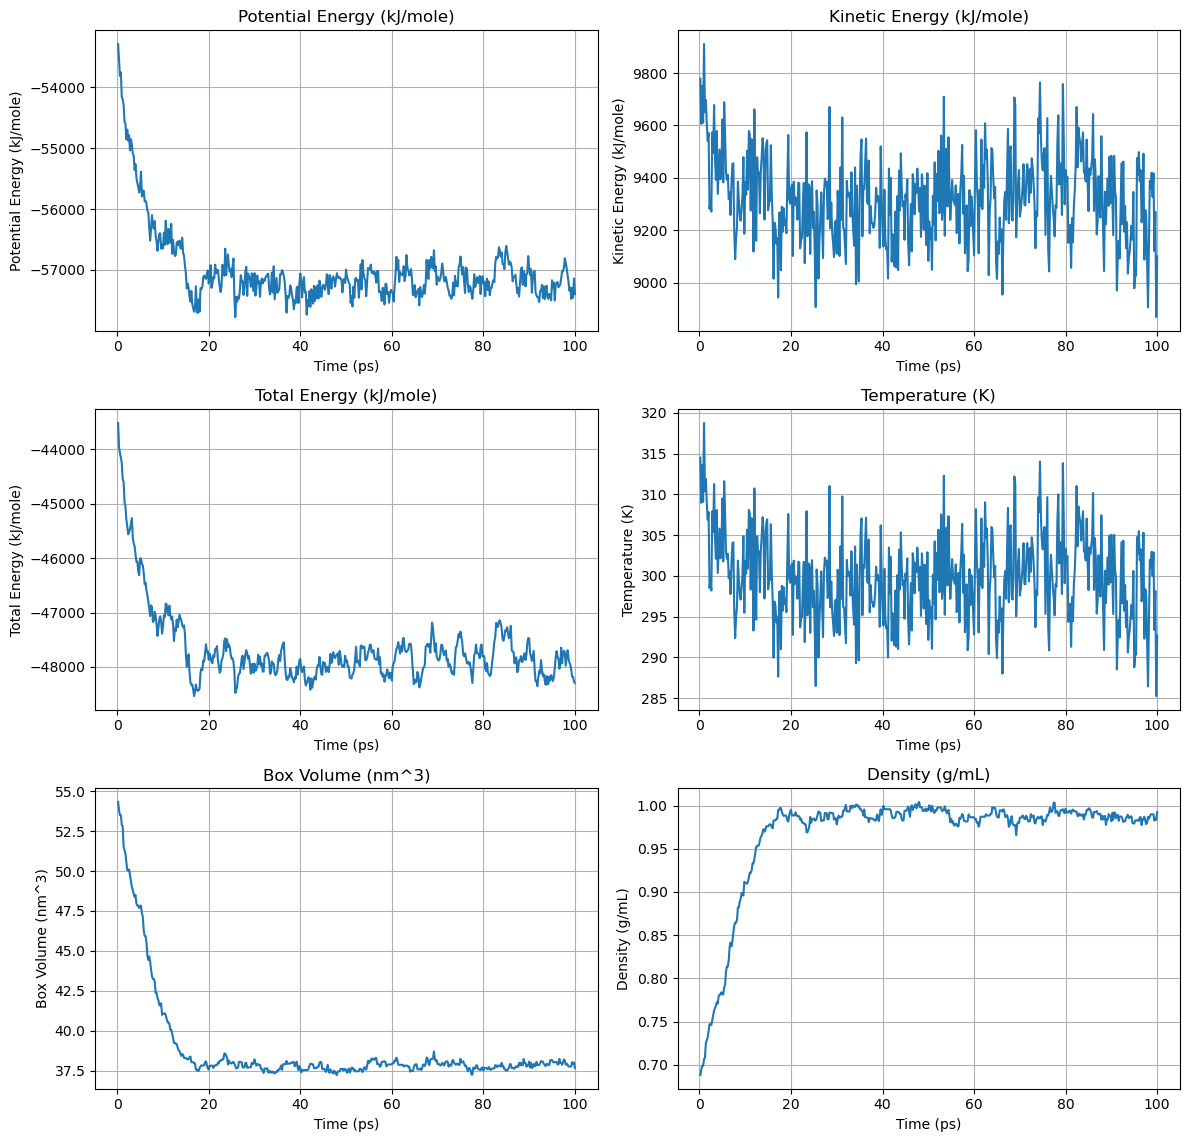

In [35]:
# Generate graphs for the equilibration stage of the simulation
simulation.graph_state_data(equilibrated_simulation_data)

The density in the above graphs has plateued, meaning the system is 'equilibrated' this is the goal of this part of the simulation.

Now we can use the **equilibrated_simulation** variable to run our production run.

In [36]:
# Run a production simualtion and retrieve the simulation and simulation data
production_simulation, production_simulation_data = simulation.production_run(equilibrated_simulation)

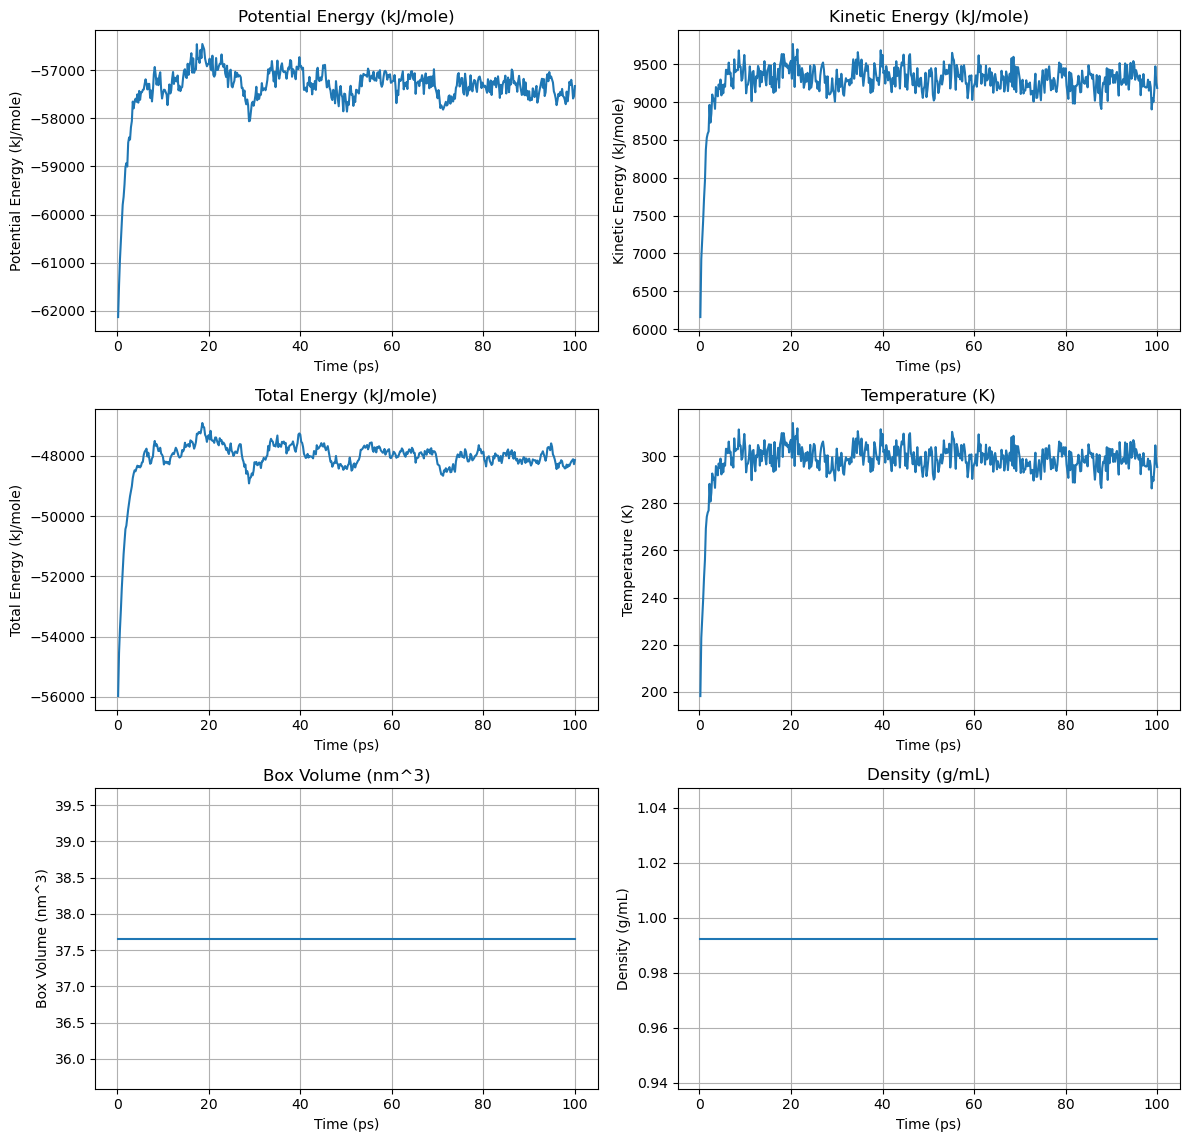

In [38]:
# Generate graphs for the production stage of the simulation
simulation.graph_state_data(production_simulation_data)

Now we have finsihed the simulation the last thing to do is check if we can access the topology and trajectory files for any analysis of the system.

In [39]:
# Load the files generated in the simulation assigned to a variable called 'output_files'
output_files = manager.retrieve_files_for_MDanalysis(simulation.filename)

caftaric_acid_wat_solv_16
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301
/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_11

In [40]:
# see what output files we have
output_files

('/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv/caftaric_acid_wat_solv_16.prmtop',
 ['/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_anneal_traj_2024-09-05_115301.dcd',
  '/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_anneal_2024-09-05_115301.pdb'],
 ['/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_1_atm_traj_2024-09-05_115301.pdb',
  '/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_1_atm_traj_2024-09-05_115301.dcd'],
 ['/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_prod_traj_2024-09-05_115301.pdb',
  '/home/dan/polymersimulator/pdb_files/systems/caftaric_acid_wat_solv_16/2024-09-05_115301/caftaric_acid_wat_solv_16_prod_traj_2024

There is a topology file (.prmtop) and a range of trajectory files (.dcd and .pdb). Each stage of the simulaiton is appropriately labelled; i.e.e **anneal**, **1_atm**, **prod**